# **About the Data**

Loading libraries and data.

In [ ]:
install.packages("mice")
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(data.table)
library(tidyverse)
library(mice)
library(dplyr)
library(zoo)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [188]:
#File manually uploaded on google colab.
flats = fread('../content/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
tail(flats)

month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
2021-08,YISHUN,5 ROOM,426A,YISHUN AVE 11,04 TO 06,112,Improved,2015,92 years 08 months,525000
2021-08,YISHUN,5 ROOM,161,YISHUN ST 11,10 TO 12,126,Improved,1985,62 years 11 months,550000
2021-08,YISHUN,5 ROOM,866,YISHUN ST 81,04 TO 06,122,Improved,1988,65 years 07 months,500000
2021-08,YISHUN,EXECUTIVE,391,YISHUN AVE 6,04 TO 06,142,Apartment,1988,65 years 11 months,648000
2021-08,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146,Maisonette,1985,63 years 01 month,620000
2021-08,YISHUN,EXECUTIVE,723,YISHUN ST 71,01 TO 03,145,Apartment,1986,63 years 10 months,595000


# **Data Cleansing**
*   Remove duplicates, handle missing data
*   Fix structural, spelling, syntax errors

In [189]:
flats = flats %>% mutate_if(is_character, as.factor)
head(flats)

month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<dbl>
2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000
2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000
2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000
2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000
2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000
2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68,New Generation,1981,63 years,275000


 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,
104712,1,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0


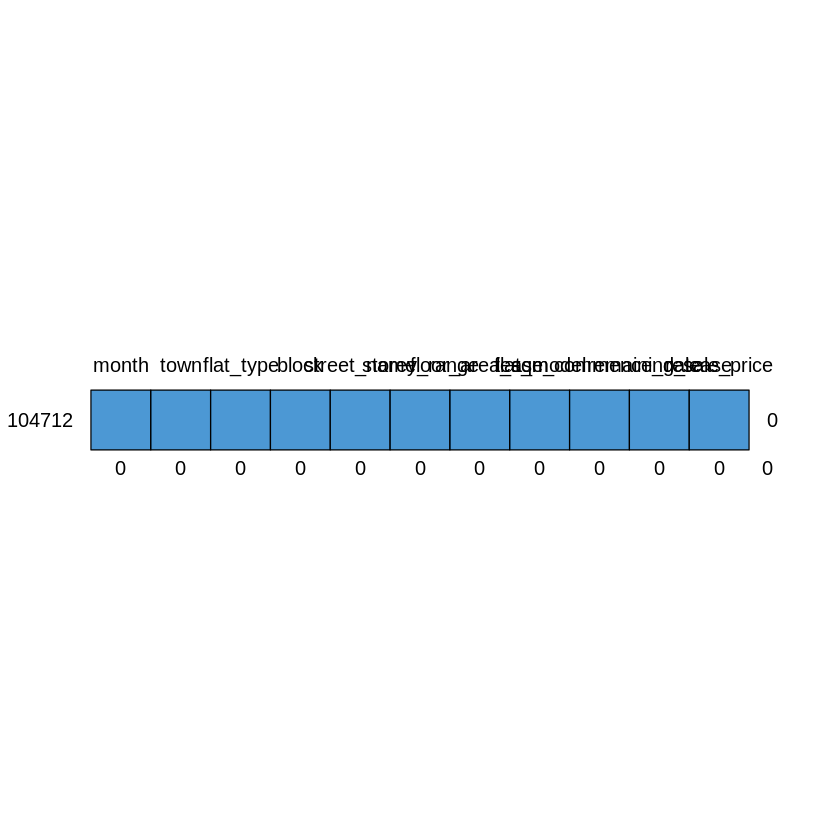

In [ ]:
#Check for NA in data
md.pattern(flats)

In [ ]:
# #Fill NA with general mean (Not used in this case)
# col_means = mice(flats, m=5, method=c("", "", "", "", "", "", "pmm", "", "", "", ""), maxit=20)
# col_means$imp$floor_area_sqm 
# flats_no_na = complete(col_means,3)


In [ ]:
# #Fill NA with group mean (Not used in this case)
# setDT(flats)
# flats = flats %>% 
#   group_by(flat_type) %>% 
#   mutate_at('floor_area_sqm', na.aggregate) #na.aggr defaults to mean. State FUN = median to change.

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,
104712,1,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0


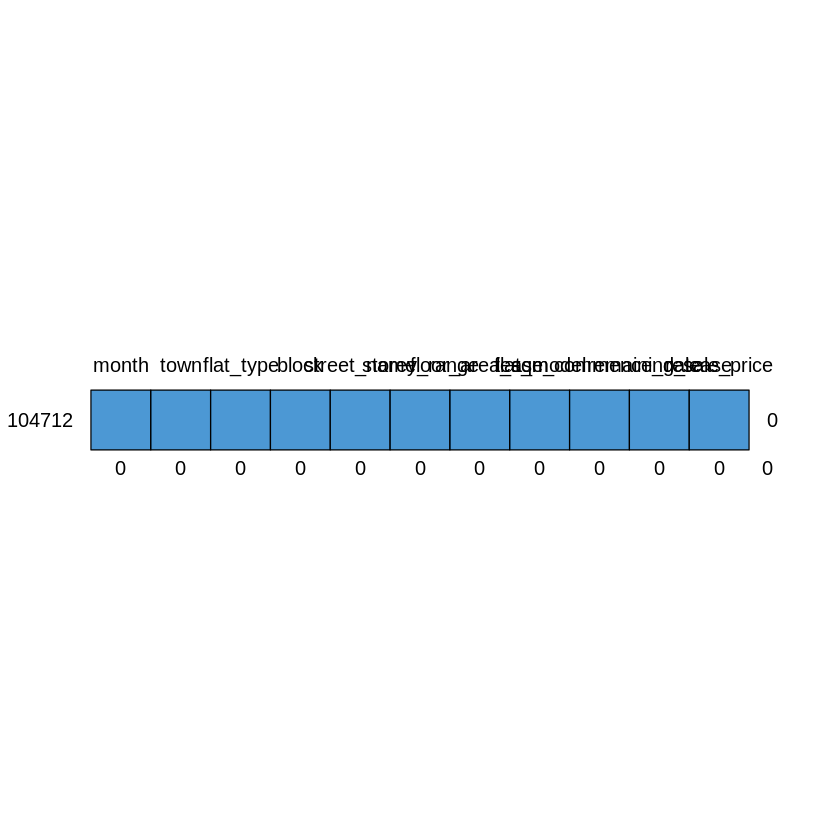

In [ ]:
#md.pattern(flats)

In [ ]:
#Visual check for irregular values for each row for non-numeric columns
for (n in 1:ncol(flats)) {
  if (is.factor(flats[[n]])){
    feature_name = colnames(flats)[n]
    unique_val = unique(flats[[n]])
    print(feature_name)
    print(unique_val)
  }
}

[1] "month"
 [1] 2017-01 2017-02 2017-03 2017-04 2017-05 2017-06 2017-07 2017-08 2017-09
[10] 2017-10 2017-11 2017-12 2018-01 2018-02 2018-03 2018-04 2018-05 2018-06
[19] 2018-07 2018-08 2018-09 2018-10 2018-11 2018-12 2019-01 2019-02 2019-03
[28] 2019-04 2019-05 2019-06 2019-07 2019-08 2019-09 2019-10 2019-11 2019-12
[37] 2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08 2020-09
[46] 2020-10 2020-11 2020-12 2021-01 2021-02 2021-03 2021-04 2021-05 2021-06
[55] 2021-07 2021-08
56 Levels: 2017-01 2017-02 2017-03 2017-04 2017-05 2017-06 2017-07 ... 2021-08
[1] "town"
 [1] ANG MO KIO      BEDOK           BISHAN          BUKIT BATOK    
 [5] BUKIT MERAH     BUKIT PANJANG   BUKIT TIMAH     CENTRAL AREA   
 [9] CHOA CHU KANG   CLEMENTI        GEYLANG         HOUGANG        
[13] JURONG EAST     JURONG WEST     KALLANG/WHAMPOA MARINE PARADE  
[17] PASIR RIS       PUNGGOL         QUEENSTOWN      SEMBAWANG      
[21] SENGKANG        SERANGOON       TAMPINES        TOA PAYOH      
[

In [ ]:
#Visual check for irregular numbers for each row for numeric columns
irr_min_check_floor_sq = 10
irr_min_check_lease = 1950
irr_min_check_price = 100000

for (n in 1:ncol(flats)) {
  if (is.numeric(flats[[n]])){
    feature_name = colnames(flats)[n]
    unique_val = unique(flats[[n]])
    print(feature_name)
    if (feature_name=="floor_area_sqm" && unique_val < irr_min_check_floor_sq) print(unique_val)
    if (feature_name=="lease_commence_date" && unique_val < irr_min_check_lease) print(unique_val)
    if (feature_name=="resale_price" && unique_val < irr_min_check_price) print(unique_val)
  }
}

[1] "floor_area_sqm"
[1] "lease_commence_date"
[1] "resale_price"


In [190]:
#Change column name to more relevant.\
colnames(flats)[1] = 'transaction_month'
colnames(flats)[9] = 'lease_commence_year'
head(flats)

transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_year,remaining_lease,resale_price
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<dbl>
2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000
2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000
2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000
2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000
2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000
2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68,New Generation,1981,63 years,275000


# **Eploratory Data Analysis (EDA)**
*   Basic description of sample and features
*   Explore data distribution
*   Identify Collinearity
*   Check out outliers

In [ ]:
cat("NUMERIC FEATURES - Continuous\n")
for (n in 1:ncol(flats)) {
  if (is.double(flats[[n]])){
    feature_name = colnames(flats)[n]
    print(feature_name)
  } 
}
cat("\nNUMERIC FEATURES - Discrete\n")
for (n in 1:ncol(flats)) {
  if (is.integer(flats[[n]])){
    feature_name = colnames(flats)[n]
    print(feature_name)
  } 
}

NUMERIC FEATURES - Continuous
[1] "floor_area_sqm"
[1] "resale_price"

NUMERIC FEATURES - Discrete
[1] "lease_commence_year"


## Numeric (Continuous) Features Analysis

In [ ]:
#View statistics of numeric (continuous) features
flats %>% select(floor_area_sqm) %>% summary()
cat("\n")
flats %>% select(resale_price) %>% summary()

 floor_area_sqm  
 Min.   : 31.00  
 1st Qu.: 82.00  
 Median : 95.00  
 Mean   : 97.82  
 3rd Qu.:113.00  
 Max.   :249.00  

  resale_price    
 Min.   : 140000  
 1st Qu.: 340000  
 Median : 420000  
 Mean   : 452121  
 3rd Qu.: 530000  
 Max.   :1268000  

Floor Area Sqm

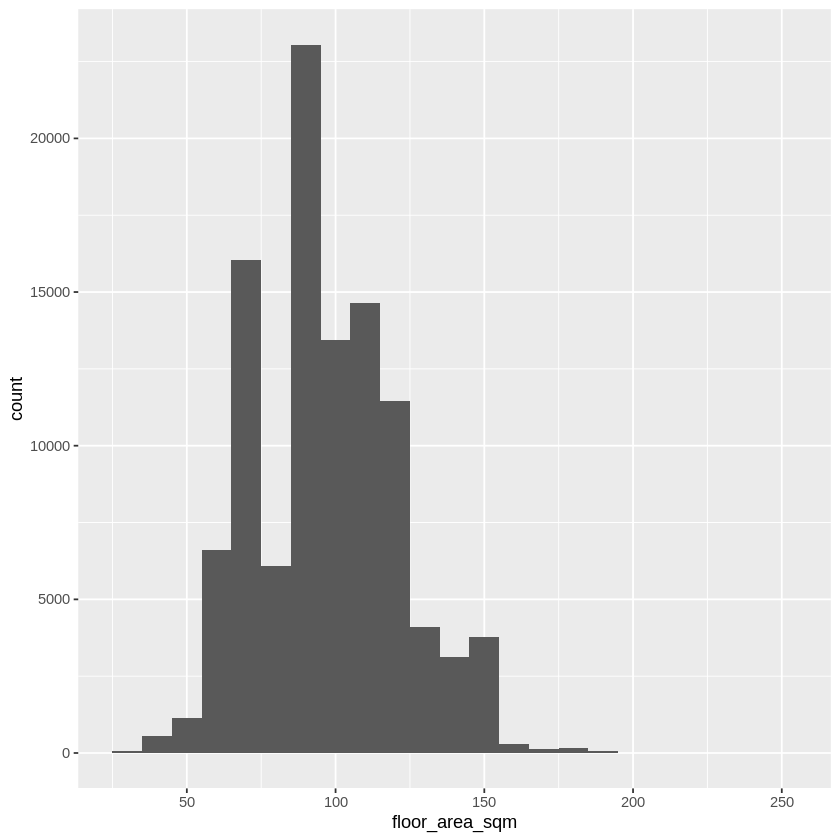

In [ ]:
#View distribution with bin size 10
ggplot(data = flats) +
  geom_histogram(mapping = aes(x = floor_area_sqm), binwidth = 10)

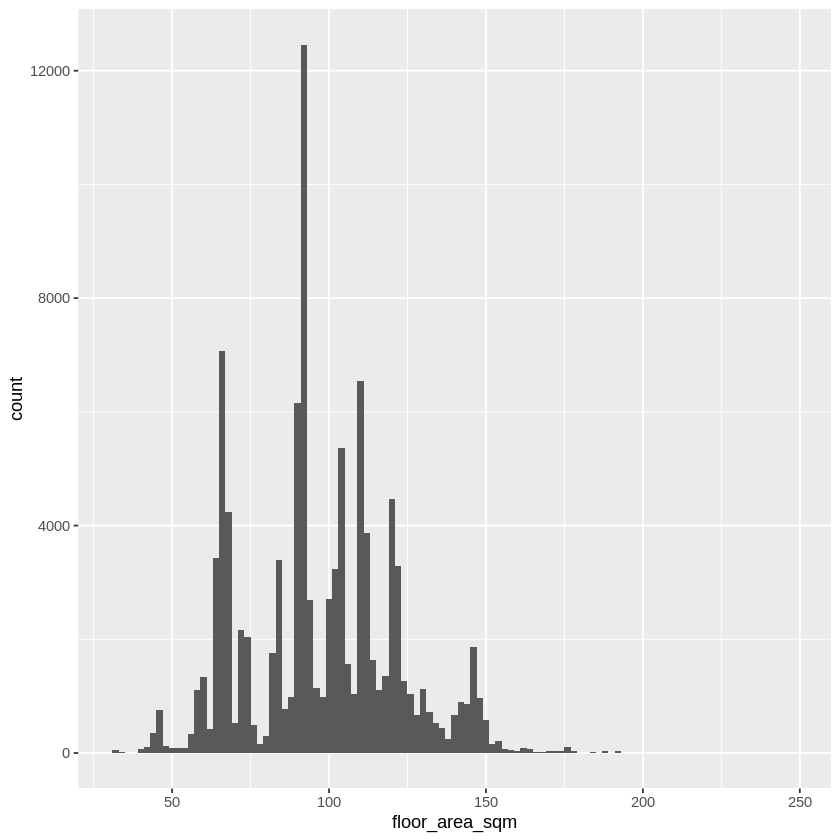

In [ ]:
#View distribution but now with bin size 2
ggplot(data = flats) +
  geom_histogram(mapping = aes(x = floor_area_sqm), binwidth = 2)

**Analysis**
* Viewing distribution of bin size 2 provided more 
insights than with bin size 10. 
* There were clear subgroups, each with a peak of its own and subsiding at both tails. 
* It seemed to clearly demarcate the range of floor areas for each flat type with one particular floor area outnumbering the rest.

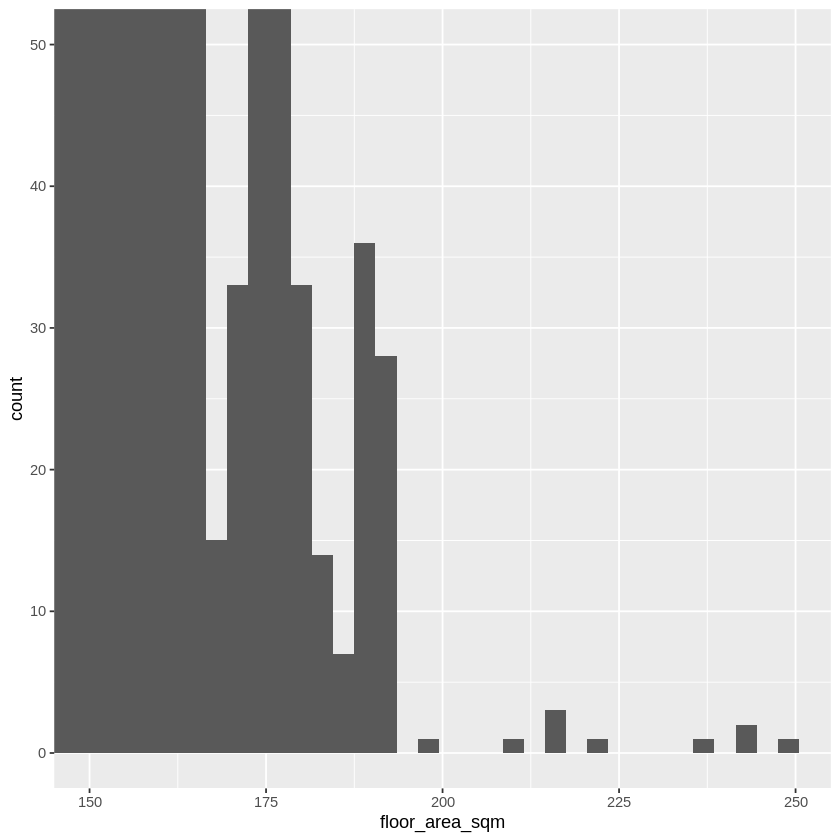

In [ ]:
#Zooming in to view the distribution on the less common bins (RHS)
ggplot(data = flats) +
  geom_histogram(mapping = aes(x = floor_area_sqm), binwidth = 3) +
  coord_cartesian(xlim = c(150, 250), ylim = c(0, 50))

In [ ]:
#View the less common bins
less_common_bins = flats %>% filter(floor_area_sqm >=195)
less_common_bins

transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_year,remaining_lease,resale_price
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<dbl>
2017-06,KALLANG/WHAMPOA,3 ROOM,38,JLN BAHAGIA,01 TO 03,215,Terrace,1972,54 years 01 month,830000
2017-09,CHOA CHU KANG,EXECUTIVE,641,CHOA CHU KANG ST 64,16 TO 18,215,Premium Maisonette,1998,79 years 04 months,888000
2017-12,KALLANG/WHAMPOA,3 ROOM,65,JLN MA'MOR,01 TO 03,249,Terrace,1972,53 years 07 months,1053888
2018-01,CHOA CHU KANG,EXECUTIVE,639,CHOA CHU KANG ST 64,10 TO 12,215,Premium Maisonette,1998,79 years,900000
2018-09,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237,Terrace,1972,52 years 10 months,1185000
2021-03,BISHAN,EXECUTIVE,446,BRIGHT HILL DR,07 TO 09,243,Maisonette,1990,68 years 01 month,1092888
2021-04,BISHAN,EXECUTIVE,454,SIN MING AVE,10 TO 12,243,Maisonette,1989,67 years 08 months,1001000
2021-04,KALLANG/WHAMPOA,3 ROOM,61,JLN TENTERAM,01 TO 03,222,Terrace,1972,50 years 03 months,1100000
2021-06,KALLANG/WHAMPOA,3 ROOM,39,JLN BAHAGIA,01 TO 03,210,Terrace,1972,50 years 01 month,1268000


**Analysis**
* As expected, these larger areas mostly come with higher prices ranging from \$830,000 to \$1,268,000.
* We also noted that the maximum value of the resale price also occurs in this range at \$1,268,000.
* Out of the 10 units, 5 have the remaining lease of less than 60 years, 3 have less than 70 years and 2 less than 80 years.
* All the flats are of the model Terrace, Premium Maisonette or Maisonette.
* All are located in Kallang/Whampoa, Chua Chu Kang or Bishan town. This may be due to the fact that such flat_types are only found in these places.



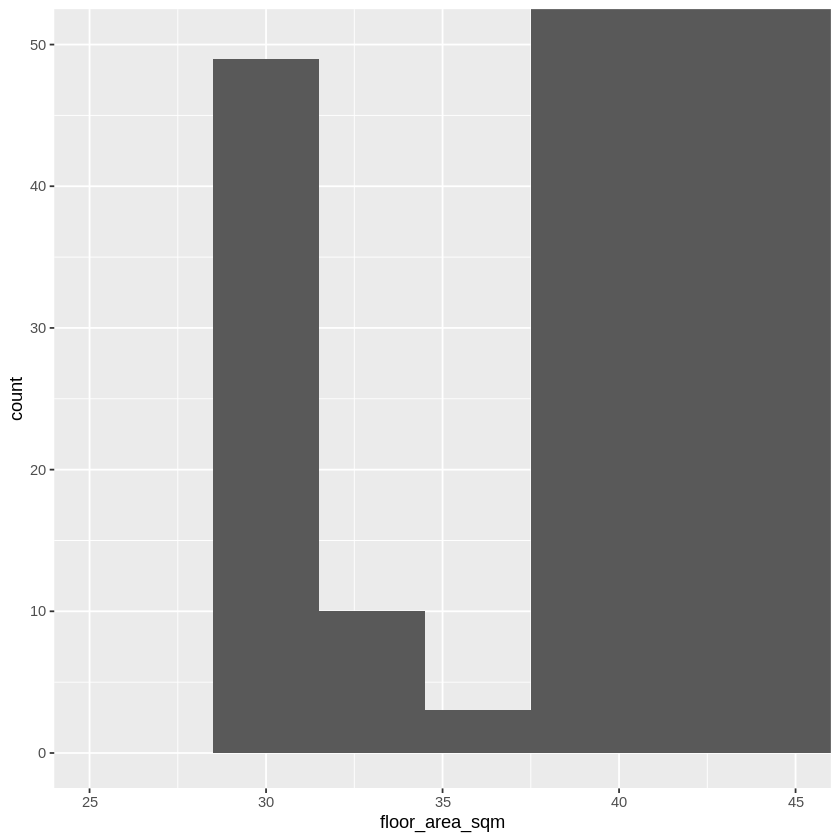

In [ ]:
#Zooming in to view the distribution on the less common bins (LHS)
ggplot(data = flats) +
  geom_histogram(mapping = aes(x = floor_area_sqm), binwidth = 3) +
  coord_cartesian(xlim = c(25, 45), ylim = c(0, 50))

**Analysis**
* Unlike the other end of the distribution, there seemed to be a decent number of flats falling into this lower range of floor area.
* The spiking at around 30 sqm and dropping at its sides mirrors the distribution at the other parts of the graph.

Resale Price

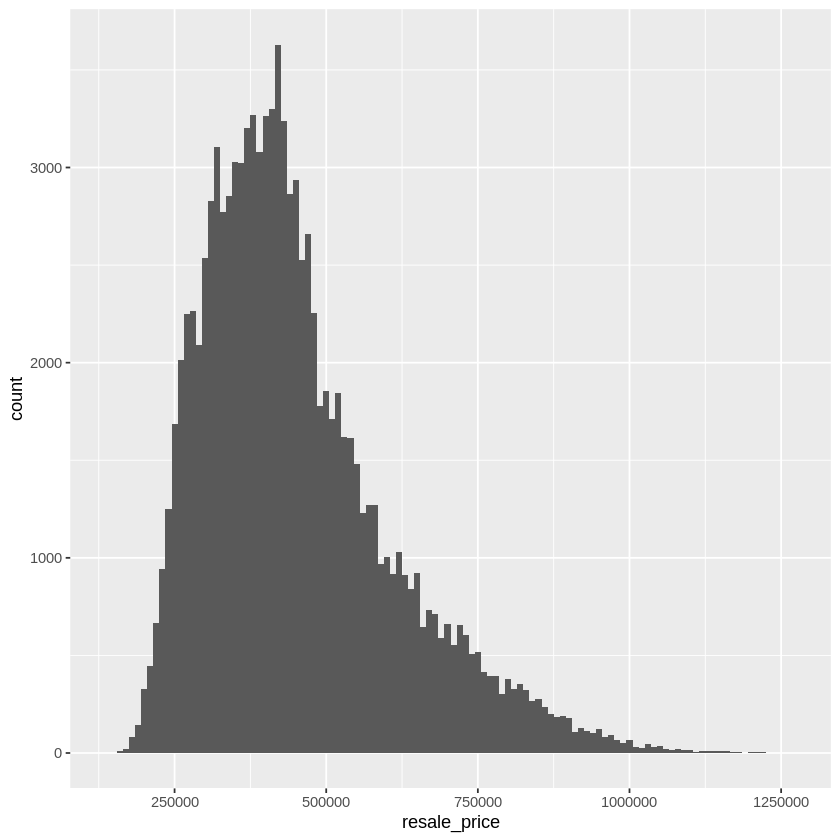

In [ ]:
#View distribution with bin size 10000
ggplot(data = flats) +
  geom_histogram(mapping = aes(x = resale_price), binwidth = 10000)

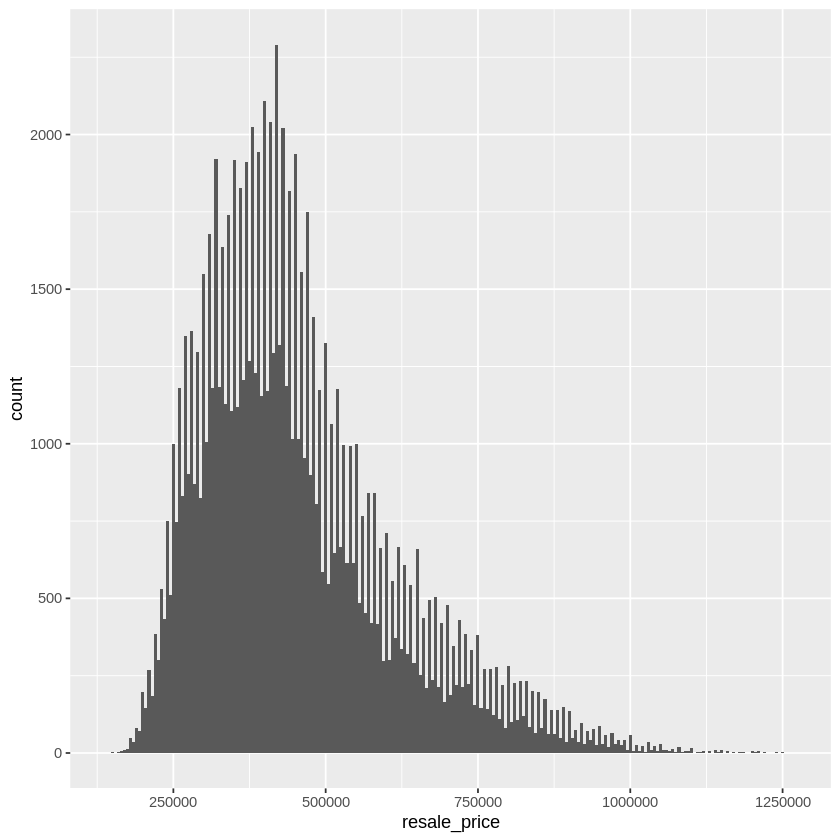

In [ ]:
#View distribution with bin size 5000
ggplot(data = flats) +
  geom_histogram(mapping = aes(x = resale_price), binwidth = 5000)

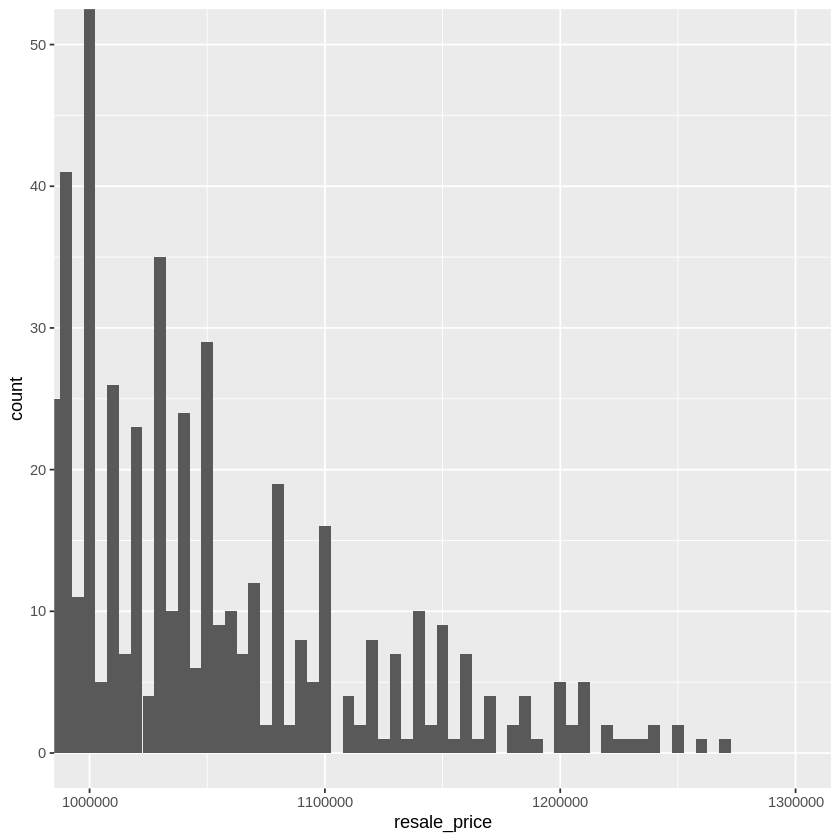

In [ ]:
#Zooming in to view the distribution on the less common bins (RHS)
ggplot(data = flats) +
  geom_histogram(mapping = aes(x = resale_price), binwidth = 5000) +
  coord_cartesian(xlim = c(1000000, 1300000), ylim = c(0, 50))

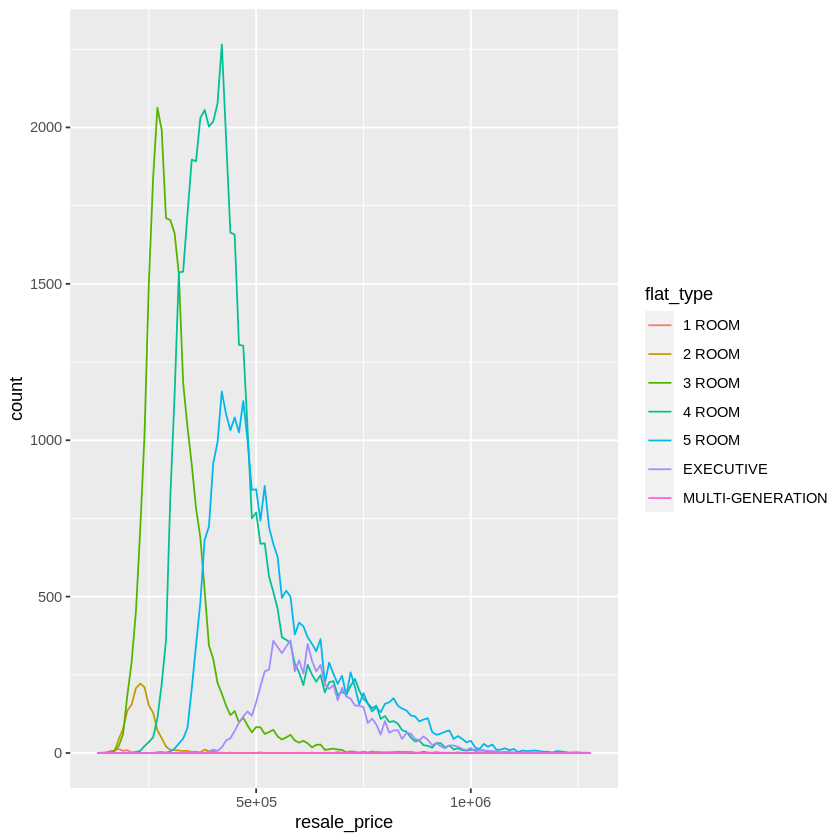

In [ ]:
#View distribution for price for each flat type
ggplot(data = flats, mapping = aes(x = resale_price, colour = flat_type)) +
  geom_freqpoly(binwidth = 10000)

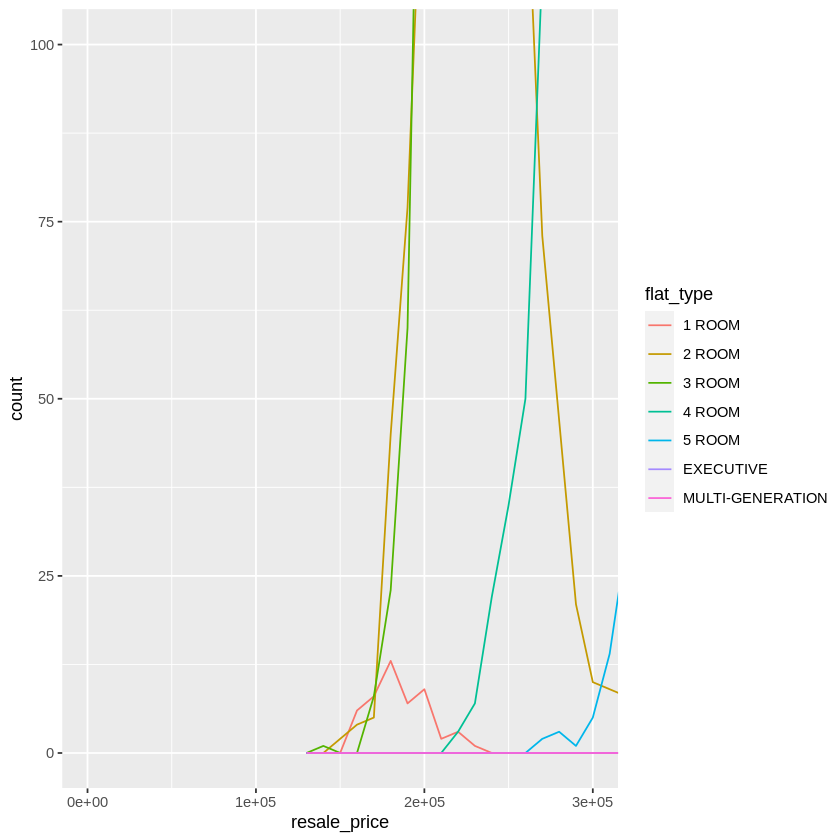

In [ ]:
 #Zoom in to see the the lesser bins
 ggplot(data = flats, mapping = aes(x = resale_price, colour = flat_type)) +
  geom_freqpoly(binwidth = 10000) +
  coord_cartesian(xlim = c(0, 300000), ylim = c(0, 100))

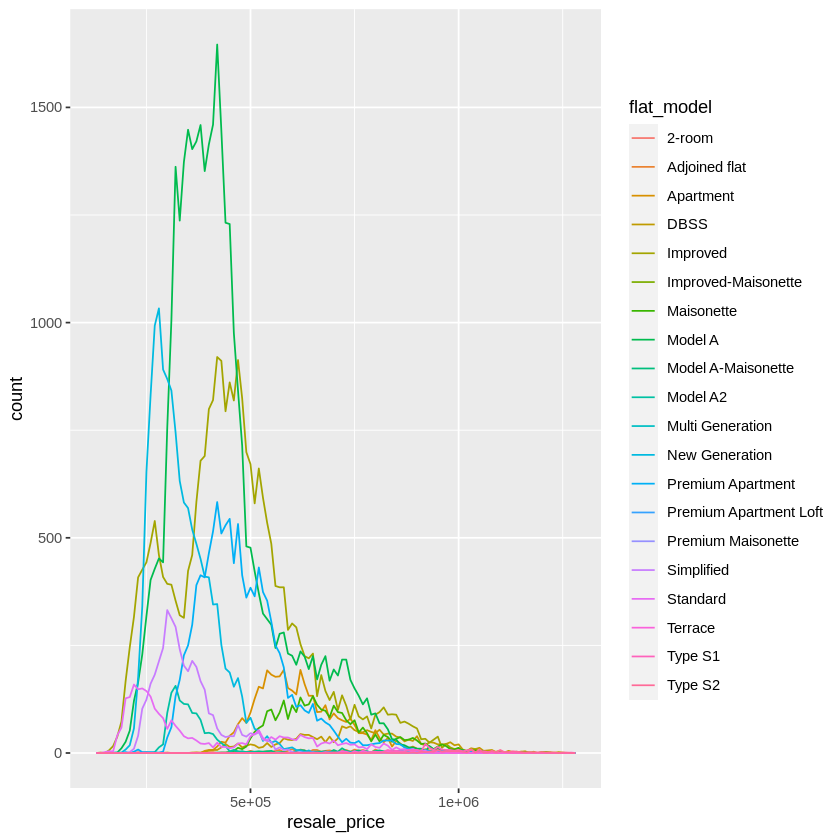

In [ ]:
#View distribution for price for each flat model
ggplot(data = flats, mapping = aes(x = resale_price, colour = flat_model)) +
  geom_freqpoly(binwidth = 10000)

In [ ]:
flats %>% 
  select(flat_type, flat_model) %>%
  group_by(flat_type) %>%
  distinct(flat_model) %>%
  arrange(flat_type)


flat_type,flat_model
<fct>,<fct>
1 ROOM,Improved
2 ROOM,Improved
2 ROOM,Standard
2 ROOM,Model A
2 ROOM,Premium Apartment
2 ROOM,DBSS
2 ROOM,2-room
3 ROOM,New Generation
3 ROOM,Improved


**Analysis**
* The distribution was skewed to the right.
* We can see that for both bin sizes, the distribution were similar.
* We can see that the skew is mainly caused my the much higher number of 3-room and 4-room flats.
* The distribution for the flat models seemed to be very similar to the flat_type. Initially it seemed like each the flat type may have its corresponding flat model. But upon checking, it is not the case.

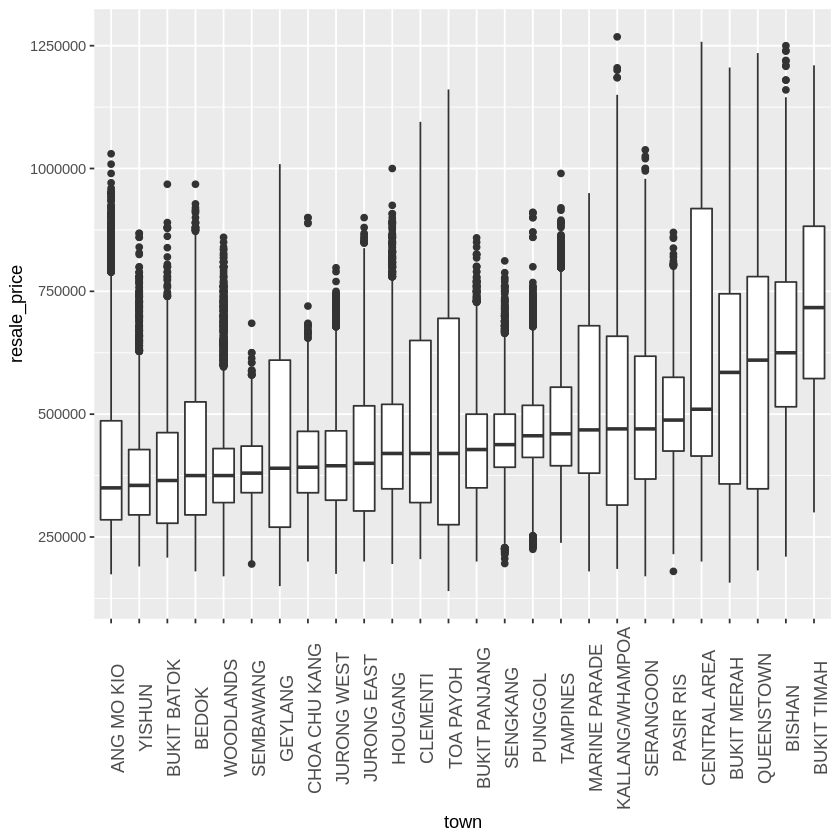

In [ ]:
flats$town = with(flats, reorder(town, resale_price, median))
ggplot(data = flats, mapping = aes(x = town, y = resale_price)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=90, size=11))

In [ ]:
#View the less common bins
flats %>% filter(resale_price > 1100000) %>% arrange(resale_price) %>% arrange(flat_model)

transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_year,remaining_lease,resale_price
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<dbl>
2018-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,149,Apartment,1995,76 years 03 months,1150000
2019-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,147,Apartment,1995,75 years 03 months,1150000
2017-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,156,Apartment,1995,77 years 03 months,1160000
2021-06,QUEENSTOWN,EXECUTIVE,150,MEI LING ST,10 TO 12,148,Apartment,1995,73 years 05 months,1235000
2019-03,KALLANG/WHAMPOA,5 ROOM,8,BOON KENG RD,34 TO 36,119,DBSS,2011,90 years 11 months,1110000
2017-07,TOA PAYOH,5 ROOM,138C,LOR 1A TOA PAYOH,40 TO 42,117,DBSS,2012,93 years 10 months,1120000
2018-08,KALLANG/WHAMPOA,5 ROOM,9,BOON KENG RD,28 TO 30,119,DBSS,2011,91 years 06 months,1120000
2018-06,KALLANG/WHAMPOA,5 ROOM,7,BOON KENG RD,37 TO 39,117,DBSS,2011,91 years 07 months,1120088
2021-01,TOA PAYOH,5 ROOM,139B,LOR 1A TOA PAYOH,37 TO 39,117,DBSS,2012,90 years 05 months,1122000


In [ ]:
#Zoom in on flat_type 'Terrace' 
flats %>% filter(resale_price > 1100000, flat_model == 'Terrace') %>% arrange(resale_price) %>% arrange(flat_model)

transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_year,remaining_lease,resale_price
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<dbl>
2021-04,KALLANG/WHAMPOA,3 ROOM,51,JLN BAHAGIA,01 TO 03,178,Terrace,1972,50 years 04 months,1140000
2021-07,KALLANG/WHAMPOA,3 ROOM,50,JLN BAHAGIA,01 TO 03,174,Terrace,1972,50 years 01 month,1140000
2018-09,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237,Terrace,1972,52 years 10 months,1185000
2021-06,KALLANG/WHAMPOA,3 ROOM,39,JLN BAHAGIA,01 TO 03,210,Terrace,1972,50 years 01 month,1268000


**Analysis**
* Many observations share similar attributes like town, street, flat_model etc. They may likely be from the same housing project.
* 2 subgroups seemed to differ from the rest a little. One is the flat_model 'Terrace'(together with other attributes) which has the lowest lease remaining and the other is the flat_model 'Apartment'(together with other attributes) which has a remaining lease of less than 80 years. The rest have remaining lease of more than 87 years. Again, they may be from the same housing project.
* The top 5 towns with the highest median price are Central, Queenstown, Bukit Merah, Bishan and Bukit Timah.

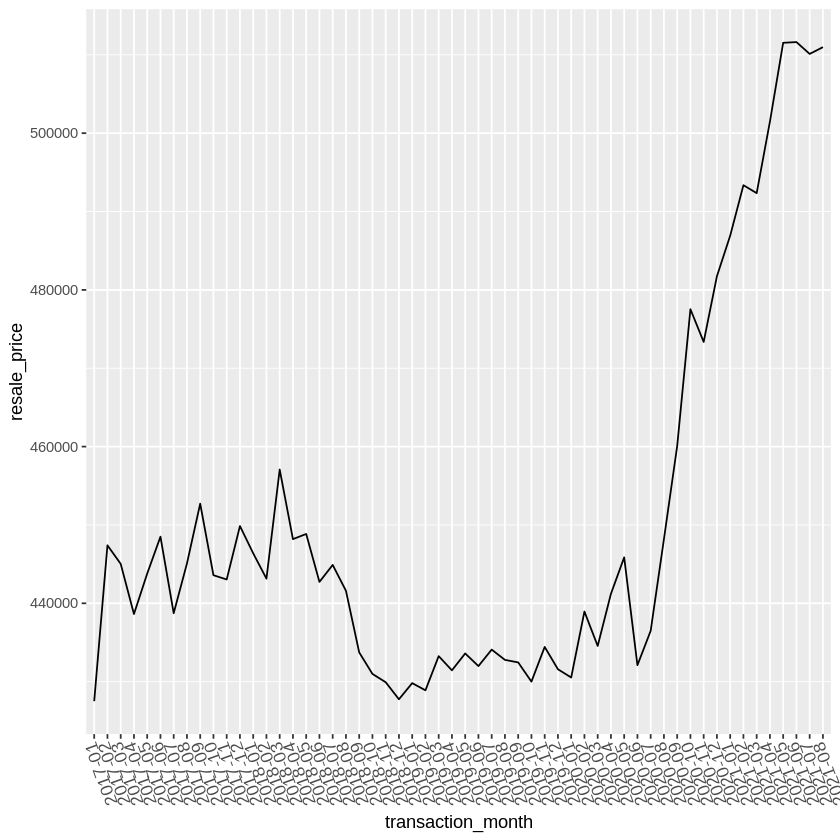

In [ ]:
#View median price changes with respect to date of transaction.
df = aggregate(flats$resale_price,
  by = list(flats$transaction_month),
  FUN = mean, na.rm = TRUE
)
colnames(df) = c("transaction_month","resale_price")

ggplot() +
  geom_line(data=df, mapping=aes(x=transaction_month, y=resale_price), group=1) +
  theme(axis.text.x = element_text(angle=110, size=11))

**Analysis**
* There was a period between Sep 2018 and Mar 2020 where median prices were comparitively low.
* There is also a notable sharp increase in prices from Apr 2020 to Aug 2021.
* There seemed to be some factors relating the period of the year to the resale price but they cannot be definitively identified here in this plot.

## Numeric (Discrete) Features Analysis

Lease Commence Year

In [ ]:
summary(flats$lease_commence_year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1966    1985    1995    1995    2004    2019 

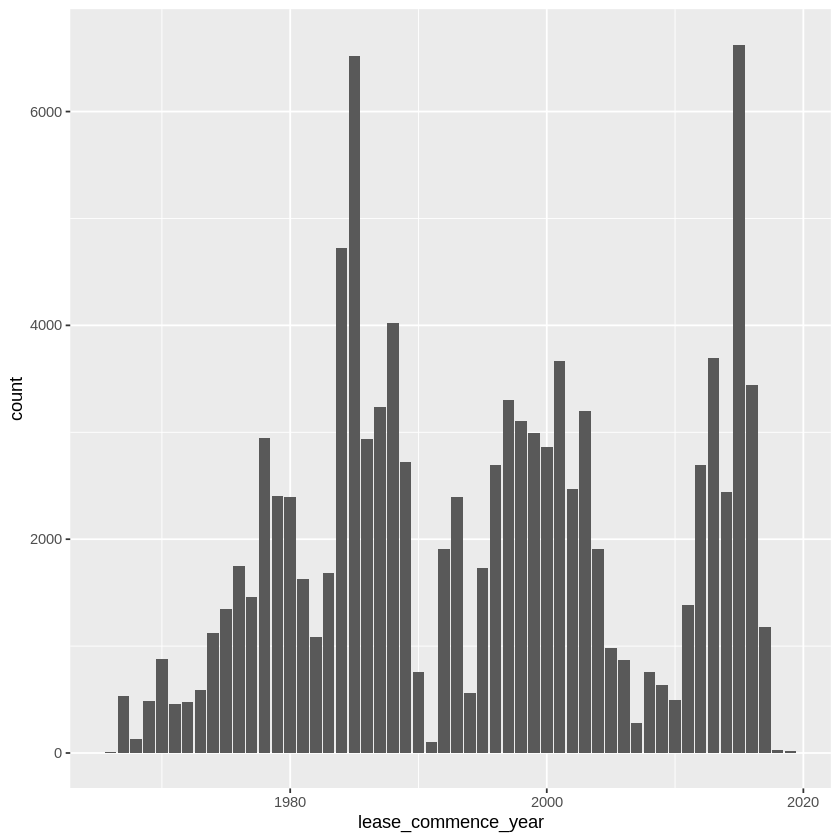

In [ ]:
ggplot(data = flats) +
  geom_bar(mapping = aes(x = lease_commence_year)) 

In [ ]:
peakBef2000 = flats %>% filter(lease_commence_year < 2000) %>% count(lease_commence_year) %>% filter(n == max(n)) %>% select(lease_commence_year, n)
peakAft2000 = flats %>% filter(lease_commence_year >= 2000) %>% count(lease_commence_year) %>% filter(n == max(n)) %>% select(lease_commence_year, n)
leastBef1980 = flats %>% filter(lease_commence_year < 1980) %>% count(lease_commence_year) %>% filter(n == min(n)) %>% select(lease_commence_year, n)
leastBef2000 = flats %>% filter(lease_commence_year >= 1980 & lease_commence_year < 2000) %>% count(lease_commence_year) %>% filter(n == min(n)) %>% select(lease_commence_year, n)
leastBef2010 = flats %>% filter(lease_commence_year >= 2000 & lease_commence_year < 2010) %>% count(lease_commence_year) %>% filter(n == min(n)) %>% select(lease_commence_year, n)
leastAft2010 = flats %>% filter(lease_commence_year >= 2010) %>% count(lease_commence_year) %>% filter(n == min(n)) %>% select(lease_commence_year, n)
cat("Peak-year before yr 2000, then respective count - ", paste(unlist(peakBef2000), collapse=', '), "\n")
cat("Peak-year after yr 2000, then respective count - ", paste(unlist(peakAft2000), collapse=', '), "\n")
cat("Least-year before yr 1980, then respective count - ", paste(unlist(leastBef1980), collapse=', '), "\n")
cat("Least-year before yr 2000, then respective count - ", paste(unlist(leastBef2000), collapse=', '), "\n")
cat("Least-year before yr 2010, then respective count - ", paste(unlist(leastBef2010), collapse=', '), "\n")
cat("Least-year after yr 2010, then respective count - ", paste(unlist(leastAft2010), collapse=', '))

Peak-year before yr 2000, then respective count -  1985, 6519 
Peak-year after yr 2000, then respective count -  2015, 6627 
Least-year before yr 1980, then respective count -  1966, 12 
Least-year before yr 2000, then respective count -  1991, 107 
Least-year before yr 2010, then respective count -  2007, 277 
Least-year after yr 2010, then respective count -  2019, 15

**Analysis**
* Peak number of commencement of lease happened in 1985 and 2015, each with more than 6000 flats.
* Least occurred in 1966, 2018 and 2019, each with around 10 flats.
* It was initially thought that the increased in number in 2015 was due to the larger number of launches in 2015. Upon investigating, launches in 2015 were not higher than other years.
* It was noted that this data captures transaction starting from Jan 2017 to Aug 2021. Due to the 5-yr MOP requirement, any flats with lease comensing after Aug 2016 may not be legally available for transaction. This is likely the reason for the lower numbers for 2017, 2018, 2019 and none for 2020 and 2021.
* This MOP requirement may also be behind the reason of the 2015 peak as these flats were matured for sale in 2020, which is a year where resale flats were in demand due to delays in new flats caused by COVID-19.
* Taking reference from this analogy, the peak in 1985 might have been due to circumstances in and around 1990. At this point of time, no supporting information have been found.

## Categorical Features Analysis

In [ ]:
cat("\nCATEGORICAL FEATURES\n")
for (n in 1:ncol(flats)) {
  if (is.factor(flats[[n]])){
    feature_name = colnames(flats)[n]
    print(feature_name)
  } 
}


CATEGORICAL FEATURES
[1] "transaction_month"
[1] "town"
[1] "flat_type"
[1] "block"
[1] "street_name"
[1] "storey_range"
[1] "flat_model"
[1] "remaining_lease"


Transaction Month

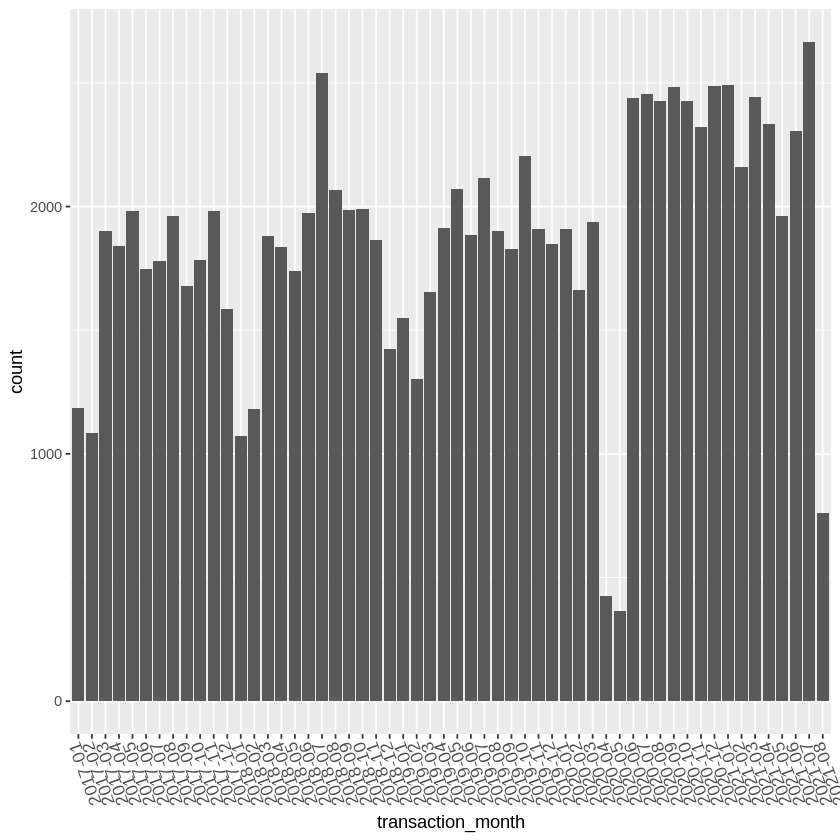

In [ ]:
#View number of transactions by month
ggplot(data = flats) +
  geom_bar(mapping = aes(x = transaction_month)) +
  theme(axis.text.x = element_text(angle=110, size=11))

**Analysis**
* The lowest months occurred in Apr and May 2020, likely due to the lockdown (Circuit Breaker) which happened during the same period.
* Januarys and Februarys seemed to always see a dip in transactions.
* The peak in Jul 2018 may be caused by the introduction of cooling measures which gave transitional provision to certain cases. (https://www.mas.gov.sg/news/media-releases/2018/raising-additional-buyers-stamp-duty-rates-and-tightening-loan-to-value-limits)
* High number of transactions can be seen from Jun 2020 onwards, confirming our previous analysis on lease_commencement_year numbers.


Town

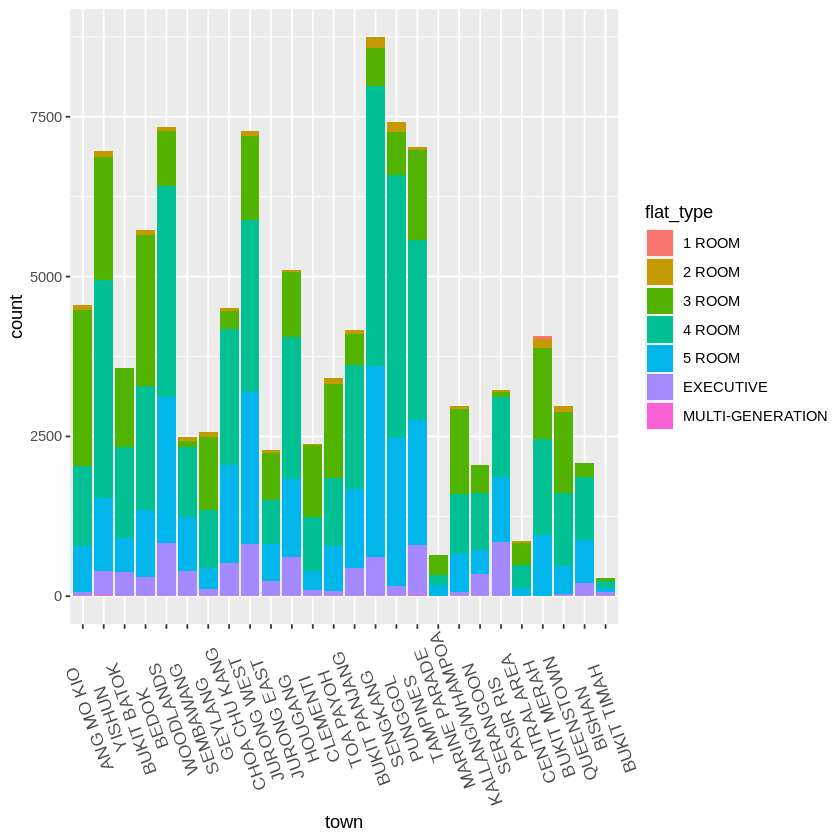

In [ ]:
#View distribution across towns with the flat type composition, sorted by ascending median price
flats$town = with(flats, reorder(town, resale_price, median))
ggplot(data = flats) +
  geom_bar(mapping = aes(x = town, fill=flat_type)) +
  theme(axis.text.x = element_text(angle=110, size=11))

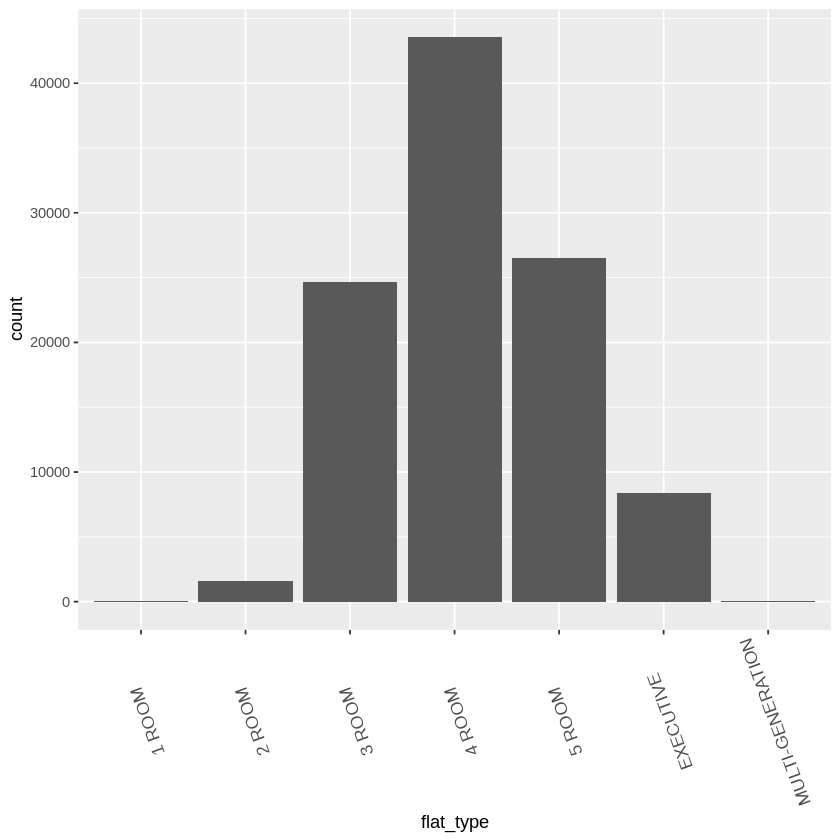

In [ ]:
#View count of each flat_type
ggplot(data = flats) +
  geom_bar(mapping = aes(x = flat_type)) +
  theme(axis.text.x = element_text(angle=110, size=11))

**Analysis**
* 3 to 5 room flats make up bulk of the transactions.
* Some towns like Central, Chua Chu Kang and Pasir Ris have lesser transactions while Serangoon, Kallang / Whampoa and Queenstown have larger numbers.
* 4 room flats has the highest number of transactions, followed by 5 room and then 3 room flats.
* We expect that certain geographical locations may have large impact on the resale price but the relationship cannot be seen here.
* While the number of each flat type varies across towns, there is no obvious pattern in terms of the flat type composition, town and price.

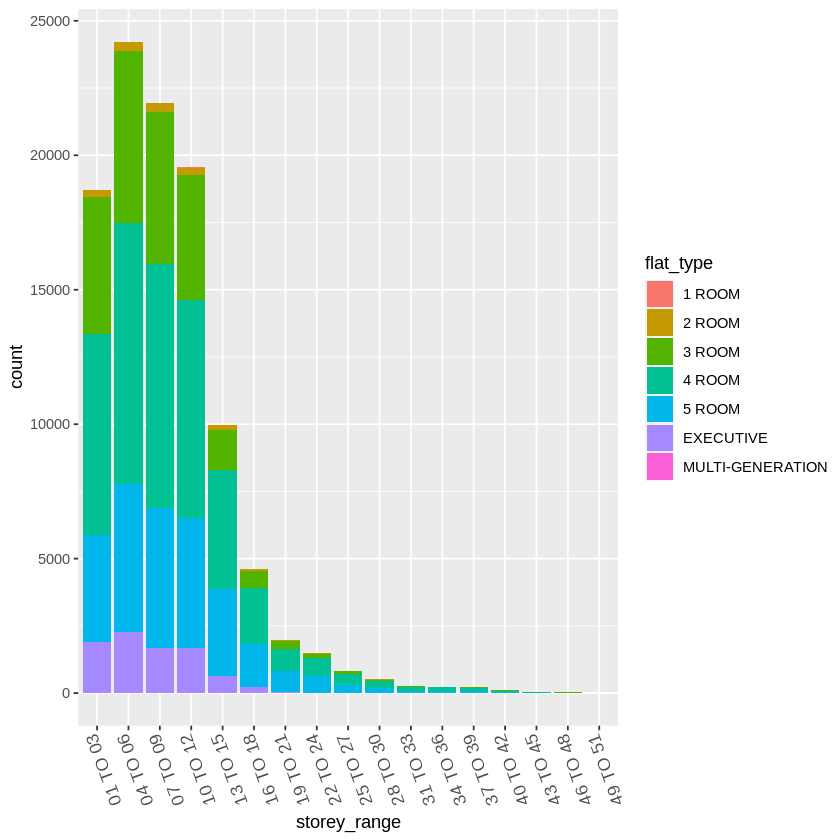

In [ ]:
#View which flat types are there in each storey range
ggplot(data = flats) +
  geom_bar(mapping = aes(x = storey_range, fill=flat_type)) +
  theme(axis.text.x = element_text(angle=110, size=11))

In [ ]:
#View the rarer high level flats
flats %>% count(storey_range) %>% filter(n<50)

storey_range,n
<fct>,<int>
43 TO 45,26
46 TO 48,23
49 TO 51,9


**Analysis**
* As expected, there are more lower storey ranges than higher ones.
* Majority of the flats are under 15 storeys high.
* The flat types are spread across the different stories rather evenly.
* There exists rare flats which are above the 43rd storeys, a total of 48 of them. Due to their comparitively tiny numbers, they cannot be seen on the plot.

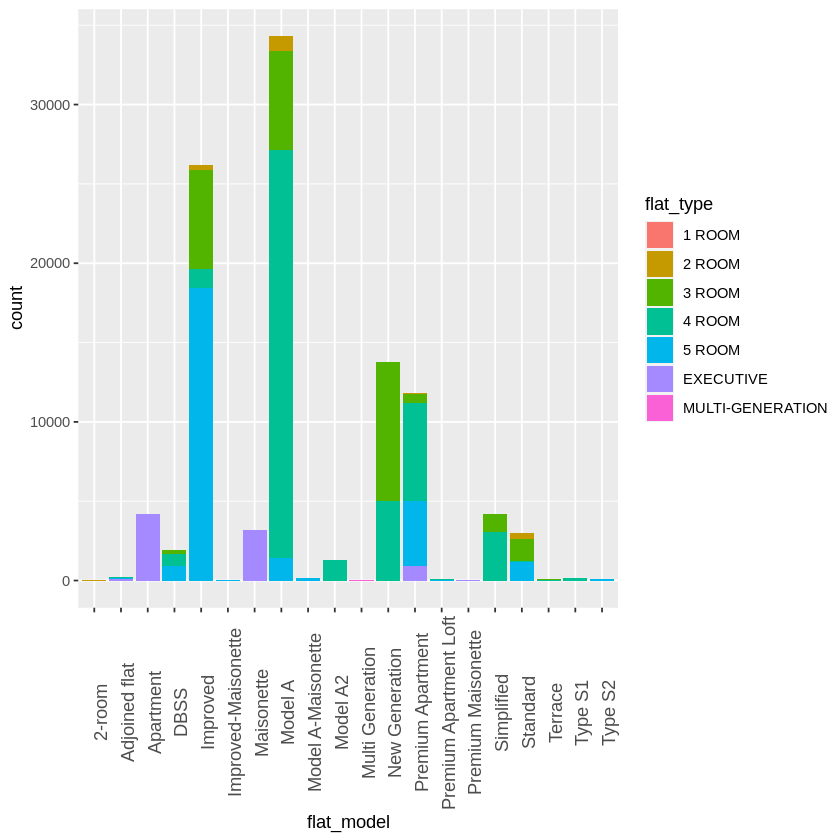

In [ ]:
#View which flat_types are consisted in each flat_model
ggplot(data = flats) +
  geom_bar(mapping = aes(x = flat_model, fill=flat_type)) +
  theme(axis.text.x = element_text(angle=90, size=11))

In [ ]:
#View unique flat_models for 'EXECUTIVE' type
flats %>% select(flat_type, flat_model) %>% filter(flat_type=='EXECUTIVE') %>% unique()

flat_type,flat_model
<fct>,<fct>
EXECUTIVE,Apartment
EXECUTIVE,Maisonette
EXECUTIVE,Premium Apartment
EXECUTIVE,Adjoined flat
EXECUTIVE,Premium Maisonette


In [ ]:
#View unique flat_models for 'MULTI-GENERATION' type
flats %>% select(flat_type, flat_model) %>% filter(flat_type=='MULTI-GENERATION') %>% unique()

flat_type,flat_model
<fct>,<fct>
MULTI-GENERATION,Multi Generation


**Analysis**
* 4 room flats made up the largest proportion of 'Model A' flat_models while 5 room flats made up the largest proportion of 'Improved'flat_models. 
* Executive-type flats are modelled only as 'Apartments', 'Premium Apartments', 'Maisonette', 'Adjoined_flat' and 'Premium Maisonette'.
* Multi-Generation type flats are modelled only as 'Multi-Generation'.

## Covariance Analysis

Lease_commence_year and remaining_leasing 

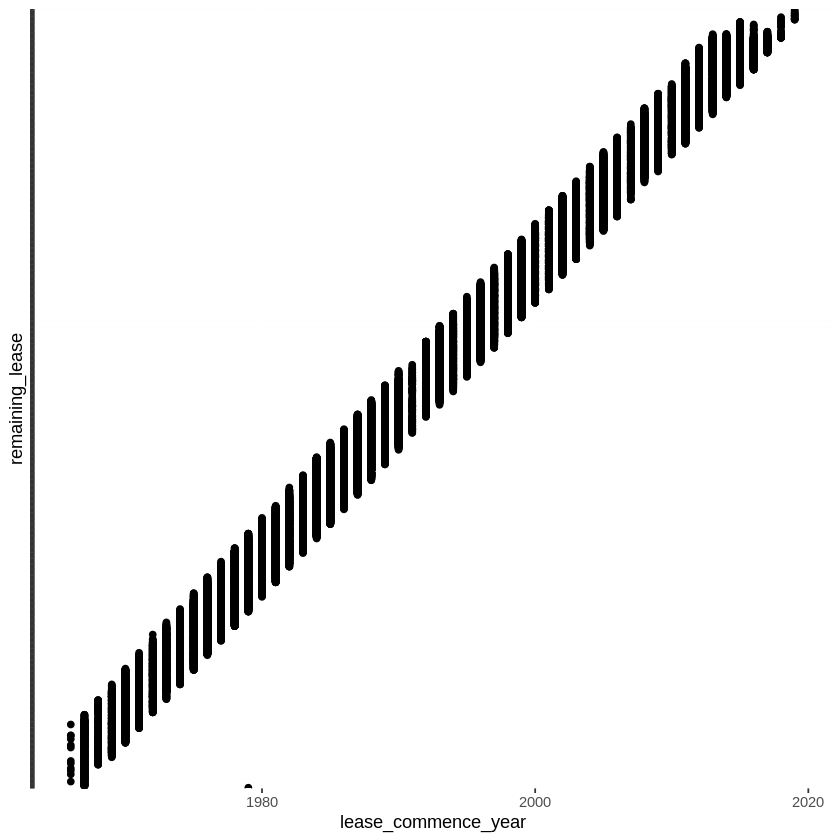

In [ ]:
#View potential relationship between lease_commence_year and remaining_lease
ggplot(data = flats) +
  geom_point(mapping = aes(x = lease_commence_year, y = remaining_lease)) +
  theme(axis.text.y = element_blank())

**Analysis**
* As expected, we can see both lease_commence_year and remaining_lease are strongly correlated.
* In fact, they are the same information but presented in different form.

Flat_type and floor_area_sqm

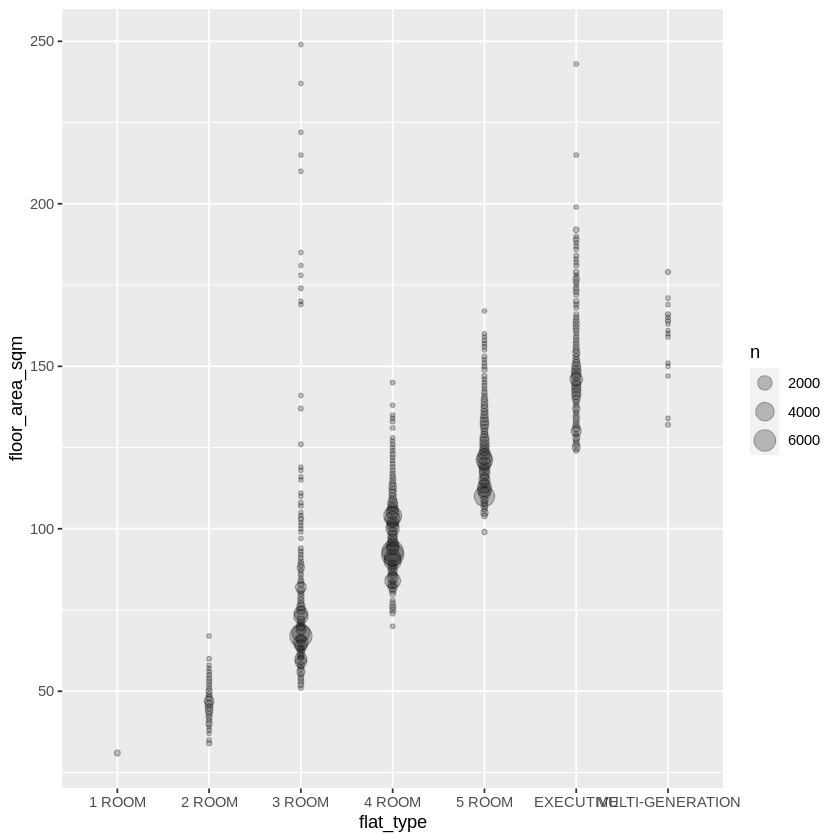

In [ ]:
#View potential relationship between flat_type and floor_area_sqm
ggplot(data = flats) +
  geom_count(mapping = aes(x = flat_type, y = floor_area_sqm), alpha=0.25)

**Analysis**
* Althought the flat area spreads over range, we can see that there is a clear progression in area as the flat_type changes.
* This is expected as we expect the size of the flats to grow with more rooms.


# **Feature Engineering**

*   Drop irrelevant or unuseful rows or columns
*   Modify or create rows or columns. Extract hidden composite information.
*   Encode categorical values
*   Fix collinearity 



## Address colinear columns

**Analysis**
* As we have found out, lease_commence_year and remaining_lease presents the same information, we can drop one of them. We will drop lease_commence_year since the other has a "month" component and hence more informative.

* Hence we drop "lease_commence_year" below

In [191]:
flats = within(flats, rm(lease_commence_year))

**Analysis**
* As for floor_area_sqm and flat_type, we also identified that they are colinear. 
* However, we do also identified that the floor area has a spread in each flat type. Removing the floor_area_sqm will cause this information to be lost.
* It seems like it would make a better choice if we remove the flat_type since we can see that for each flat type, the floor_area concentrates over a distinct range with little overlap.
* There is a greater overlap for 'EXECUTIVE' and 'MULTI-GENERATION' type flats but as noted in our analysis, these flat-types can be identified by the 'flat_model' attribute due to the naming/modelling convention.
* Therefore, we drop the "flat_type" column below.

In [192]:
flats = within(flats, rm(flat_type))

##Dropping Irrelevant / Unuseful Attributes

**Analysis**
* While street names can be useful in predicting the prices, there are too many to realistically analysis. Moreover, since we already have a town attribute, some of the characteristics of the street would be already reflected.
* As for block numbers, they are not relevant and we shall drop them too. 
* Therefore, we drop the 'street_name'and 'block' attributes.

In [193]:
flats = within(flats, rm(block, street_name))

##Extract information from composite attributes 

**Analysis**
* As identified above, the transactions are usually lower during certain months of the year.
* There is also a upward trend as analysis above from Apr 2020 onwards.
* As such, there may be independent relationships for month and year.
* Therefore, we shall create a column for "transaction_month" and "transaction_year" below.


In [194]:
flats[,"transaction_year"] = as.integer(substr(flats$transaction_month, 1, 4))
flats[,"transaction_mth"] = as.integer(substr(flats$transaction_month, 6, 7))

In [195]:
flats = within(flats, rm(transaction_month))

**Analysis**
* Remaining_lease is a continuous numeric attribute and would be more useful if we convert it as such.
* Therefore, we create "remaining_year" and "remaining_month" columns below.

In [196]:
flats[,"remaining_year"] = as.integer(parse_number(substring(flats$remaining_lease,1,3)))
flats[,"remaining_month"] = as.integer(parse_number(substring(flats$remaining_lease,8,15)))
flats$remaining_month[is.na(flats$remaining_month)] = as.integer(0)

Warning message:
“8546 parsing failures.
row col expected actual
  6  -- a number      s
 16  -- a number      s
 19  -- a number      s
 23  -- a number      s
 27  -- a number      s
... ... ........ ......
See problems(...) for more details.
”


In [197]:
flats = within(flats, rm(remaining_lease))

# **Final Processed Data**

In [198]:
tail(flats)

town,storey_range,floor_area_sqm,flat_model,resale_price,transaction_year,transaction_mth,remaining_year,remaining_month
<fct>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<int>
YISHUN,04 TO 06,112,Improved,525000,2021,8,92,8
YISHUN,10 TO 12,126,Improved,550000,2021,8,62,11
YISHUN,04 TO 06,122,Improved,500000,2021,8,65,7
YISHUN,04 TO 06,142,Apartment,648000,2021,8,65,11
YISHUN,04 TO 06,146,Maisonette,620000,2021,8,63,1
YISHUN,01 TO 03,145,Apartment,595000,2021,8,63,10


**End of Processing**
* Most columns are now numeric. 
* Others may need to be categorical or one-hot encoded depending of computation.
* Data is ready for model fitting. 

In [199]:
file_name = paste("../content/flats_processed_", as.character(Sys.Date()), ".csv")
write.csv(flats,file_name, row.names = FALSE)